In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import OneHotEncoder

# Census Data

Kohavi, R. (1996). Census Income [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5GP7S.

In [2]:
# fetch dataset 
census_income = fetch_ucirepo(id=20) 
  
# data (as pandas dataframes) 
X = census_income.data.features 
y = census_income.data.targets 
  
census_income.data.headers



Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [3]:
X['income'] = y['income']
df = X.copy()
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


## Handling Missing or NaN values

In [3]:
df_nulls = df[df.isnull().any(axis= 1)]
df_nulls

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32565,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.
32567,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K.
32574,58,NaN,299831,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,<=50K.
32580,40,Private,85019,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,NaN,>50K.
32583,72,NaN,132015,7th-8th,4,Divorced,NaN,Not-in-family,White,Female,0,0,6,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48769,21,NaN,212661,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.
48800,73,NaN,144872,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,25,Canada,<=50K.
48812,81,NaN,26711,Assoc-voc,11,Married-civ-spouse,NaN,Husband,White,Male,2936,0,20,United-States,<=50K.
48826,50,Local-gov,139347,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,NaN,>50K.


In [4]:
df.columns[df.isna().any()]

Index(['workclass', 'occupation', 'native-country'], dtype='object')

Handling the missing values for all three columns with missing values will be done by changing the NaN values to 'Unknown'. This is done so that the data can be kept in rather than being dropped, and so that by inspection it can clearly be seen that the values have been categorized.

### Occupation

In [4]:
occupation_valuecounts = df['occupation'].value_counts()
occupation_isnull = df['occupation'].isna().sum()
print(occupation_valuecounts)
print('NaN values in the "Occupation" column:', occupation_isnull)

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
?                    1843
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64
NaN values in the "Occupation" column: 966


In [5]:
df['occupation'] = df['occupation'].fillna('Unknown')
df['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
?                    1843
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Unknown               966
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

### Workclass

In [6]:
workclass_groups = df['workclass'].value_counts()
workclass_isnull = df['workclass'].isna().sum()
print(workclass_groups)
print('NaN values in the "Workclass" column:', workclass_isnull)

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64
NaN values in the "Workclass" column: 963


In [7]:
df['workclass'] = df['workclass'].fillna('Unknown')
df['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Unknown               963
Without-pay            21
Never-worked           10
Name: count, dtype: int64

### Native Country

In [8]:

native_groups = df['native-country'].value_counts()
native_isnull = df['native-country'].isna().sum()
print(native_groups)
print('NaN values in the "native-country" column:', native_isnull)

native-country
United-States                 43832
Mexico                          951
?                               583
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

In [9]:
df['native-country'] = df['native-country'].fillna('Unknown')
df['native-country'].value_counts()

native-country
United-States                 43832
Mexico                          951
?                               583
Philippines                     295
Unknown                         274
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua    

## Income

The Income column had some values with a period at the end, creating 4 categories as opposed to the binary options of <=50K or >50K. I'm choosing the remove the period because there isn't any documentation explaining a reasoning for the period.

In [10]:
income_valuecounts = df['income'].value_counts()
income_valuecounts

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

In [11]:
df['income'] = df['income'].str.replace(r'\.$', '', regex= True)
print(df['income'].value_counts())

income
<=50K    37155
>50K     11687
Name: count, dtype: int64


In [12]:
cleaned_df = df.copy()

In [14]:
cleaned_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


## Handling Categorical Data

### Sex
Converting the Sex column to a numerical value rather than the categorical.
* **0 = Male**
* **1 = Female**

In [31]:
cleaned_df['sex-num'] = df['sex'].apply(lambda x: 1 if x =='Female' else 0)
cleaned_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,higher-edu,sex-num
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K,1,1
48838,64,Unknown,321403,HS-grad,9,Widowed,Unknown,Other-relative,Black,Male,0,0,40,United-States,<=50K,0,0
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K,1,0
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K,1,0


### Race

In [32]:
cleaned_df['race'].value_counts()

race
White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64

In [34]:
# One-hot encodoing Race column
#encoder = OneHotEncoder(drop= 'first', sparse_output= False)
cleaned_df = pd.get_dummies(cleaned_df, columns=['race'], drop_first=True)
cleaned_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income,higher-edu,sex-num,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K,1,0,False,False,False,True
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K,1,0,False,False,False,True
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K,0,0,False,False,False,True
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K,0,0,False,True,False,False
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K,1,1,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,Female,0,0,36,United-States,<=50K,1,1,False,False,False,True
48838,64,Unknown,321403,HS-grad,9,Widowed,Unknown,Other-relative,Male,0,0,40,United-States,<=50K,0,0,False,True,False,False
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Male,0,0,50,United-States,<=50K,1,0,False,False,False,True
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Male,5455,0,40,United-States,<=50K,1,0,True,False,False,False


### Work Class

In [35]:
cleaned_df['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Unknown               963
Without-pay            21
Never-worked           10
Name: count, dtype: int64

### Education
Creating a simplified column to display whether someone has any schooling past high-school. Where:
* **0 =** max education at or below high-school
* **1 =** Any education past high-school

In [20]:
cleaned_df['education'].value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [26]:
higher_edu = ['Some-college', 'Bachelors', 'Masters', 'Assoc-voc', 'Assoc-acdm', 'Doctorate']
cleaned_df['higher-edu'] = cleaned_df['education'].apply(lambda x: 1 if x in higher_edu else 0)
if 'education-simplified' in cleaned_df.columns:
    cleaned_df.drop('education-simplified', axis= 1, inplace= True)
else:
    pass
cleaned_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,higher-edu
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K,1
48838,64,Unknown,321403,HS-grad,9,Widowed,Unknown,Other-relative,Black,Male,0,0,40,United-States,<=50K,0
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K,1
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K,1


In [27]:
numerical_columns = cleaned_df.select_dtypes(include=[np.number])
categorical_columns = cleaned_df.select_dtypes(include=['object', 'category'])
categorical_columns

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
48837,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,United-States,<=50K
48838,Unknown,HS-grad,Widowed,Unknown,Other-relative,Black,Male,United-States,<=50K
48839,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
48840,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,United-States,<=50K


In [28]:
numerical_columns.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,higher-edu
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558,-0.036152
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519,-0.018042
education-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689,0.662290
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157,0.029006
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467,0.041901
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000,0.049004
higher-edu,-0.036152,-0.018042,0.662290,0.029006,0.041901,0.049004,1.000000


## Data Exploration

<Axes: xlabel='count', ylabel='education'>

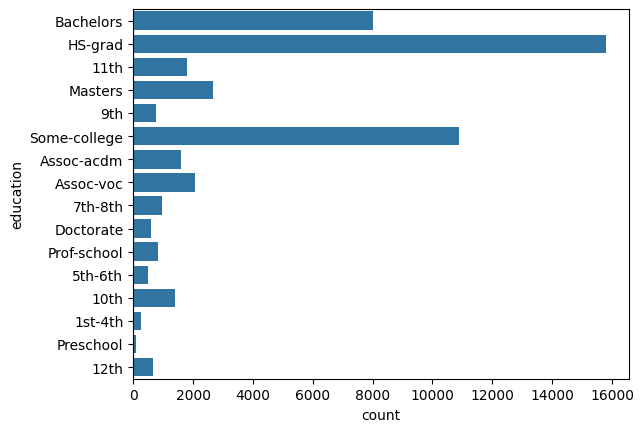

In [106]:
sns.countplot(cleaned_df['education'])

<Axes: xlabel='sex', ylabel='Count'>

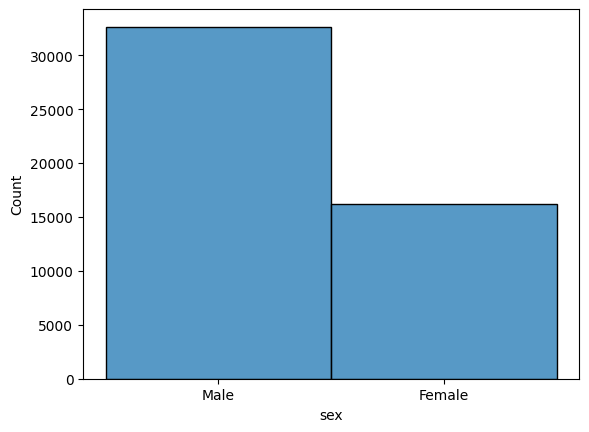

In [104]:
sns.histplot(cleaned_df['sex'])

c:\Users\zagge\miniforge3\envs\practice\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\zagge\miniforge3\envs\practice\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='race', ylabel='count'>

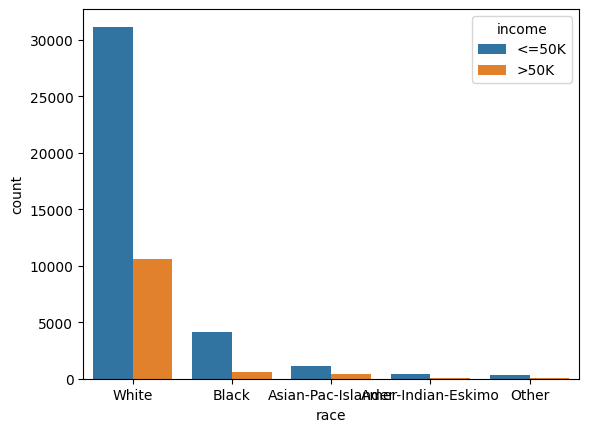

In [102]:
sns.countplot(cleaned_df, x= 'race', hue= 'income')